In [31]:
import random

import pandas as pd

import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import plotly.express as px

from gensim.models import Word2Vec
from gensim.models.callbacks import CallbackAny2Vec

from collections import defaultdict

from process import process_metadata

In [69]:
df = process_metadata('Export', save_csv=False)

In [72]:
df.head()

,title,file_type,url,description,creation_time,photo_taken_time,latitude,longitude,altitude,people
id,,,,,,,,,,
AF1QipPRmgTKxK0yxJBfdabqEzRzDuRHvjO4FR89abx-,20170505_224107.jpg,JPG,https://photos.google.com/photo/AF1QipPRmgTKxK...,,2017-05-06 00:55:20+00:00,2017-05-05 20:41:07+00:00,59.336944,18.065000,-0.0,None
AF1QipPBzOH3QMwnvQhktlT_ERlm8js6TMQVkWr9M7ll,20170903_010050.jpg,JPG,https://photos.google.com/photo/AF1QipPBzOH3QM...,,2017-09-03 07:48:55+00:00,2017-09-02 23:00:50+00:00,59.335000,18.028889,-0.0,None
AF1QipNKUU1RNleN3-A_Dcy_TAuu9oLbj7ftuOOSMsDZ,20171104_005757.jpg,JPG,https://photos.google.com/photo/AF1QipNKUU1RNl...,,2017-11-04 00:43:15+00:00,2017-11-03 23:57:57+00:00,NaN,NaN,0.0,None
AF1QipNGAh6e6_3_rOfDfHkexOInSfu2p7f64qhHfxlh,20171016_190059_1.mp4,MP4,https://photos.google.com/photo/AF1QipNGAh6e6_...,,2017-10-16 17:19:19+00:00,2017-10-16 17:03:46+00:00,59.330600,18.027700,0.0,None
AF1QipOp_3jNhuwU-2UK9IB8cnrAPTly6OxyIqnW9qrX,IMG_20160716_203420.jpg,JPG,https://photos.google.com/photo/AF1QipOp_3jNhu...,,2024-05-15 07:09:51+00:00,2016-07-16 18:34:21+00:00,NaN,NaN,0.0,"{Sergio Floriano, Ramon Claramunt, Guillem Car..."


In [7]:
# Use pictures that contain people only
df = df[df.people.notnull()]

In [8]:
df.shape

(13383, 10)

In [11]:
documents = defaultdict(list)

for _, row in df.iterrows():
    for person in row.people:
        documents[person].append(row.url)

In [26]:
# What's the distribution of pictures per person? 
doc_words = sorted(
    [(f"p{i}", len(photos)) for i, (person, photos) in enumerate(documents.items())], key=lambda x: x[1], reverse=True
)

docs = [d for d, _ in doc_words]
words = [w for _, w in doc_words]

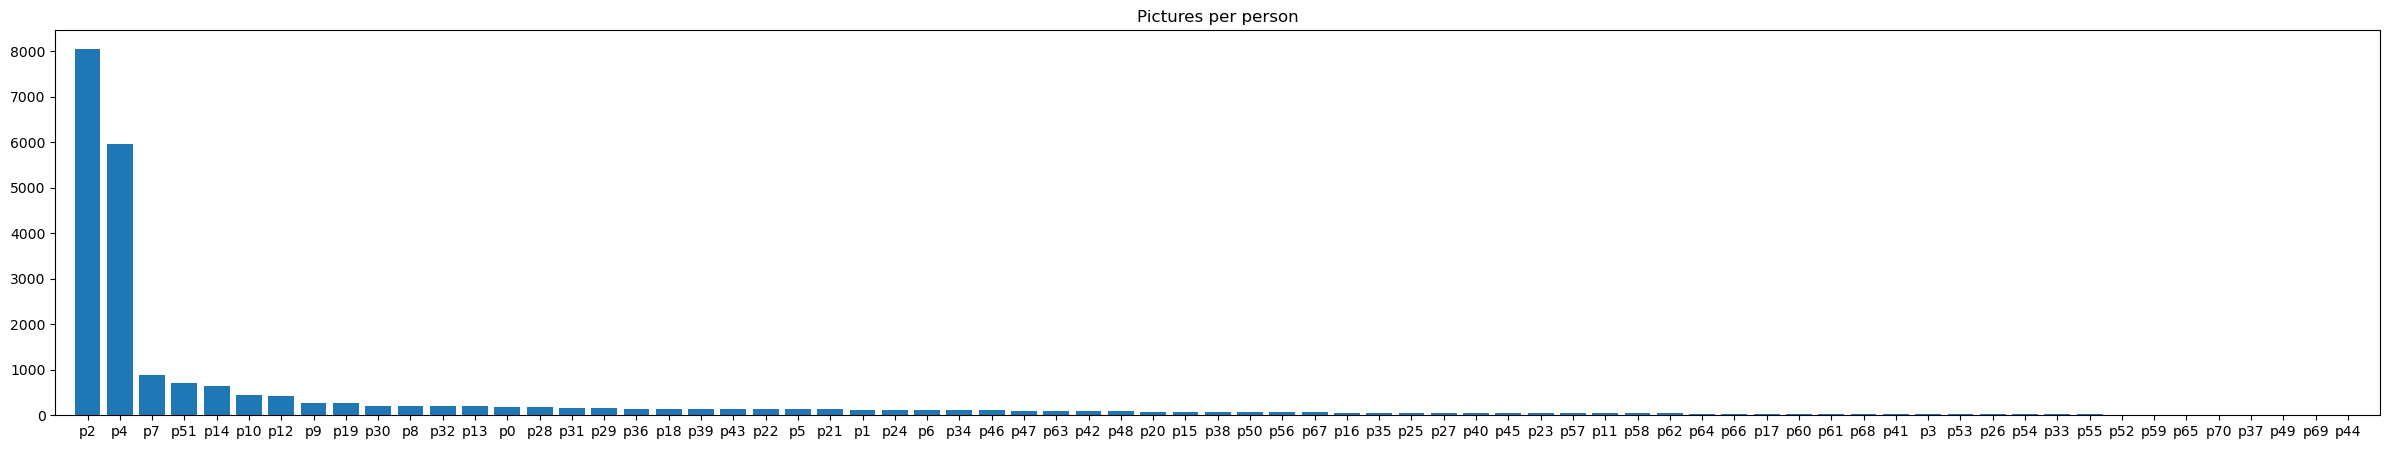

In [68]:
plt.figure(figsize=(30, 5))
plt.bar(docs, words)
plt.xlim(-1, len(docs))
_ = plt.title('Pictures per person')

In [57]:
print(f"Smallest document: {min(words)}")

Smallest document: 5


# Train a word2vec model

## Photo2Vec

In [44]:
class Callback(CallbackAny2Vec):
    """Callback to print loss after each epoch."""

    def __init__(self):
        self.epoch = 0
        self.losses = []

    def on_epoch_begin(self, model):
        print("Epoch #{} start".format(self.epoch))

    def on_epoch_end(self, model):
        loss = model.get_latest_training_loss()
        if self.epoch == 0:
            print("Loss after epoch {}: {}".format(self.epoch, loss))
        else:
            print("Loss after epoch {}: {}".format(self.epoch, loss - self.losses[-1]))
        self.losses.append(loss)
        self.epoch += 1


class PhotoCorpus:
    """An iterator that yields sentences (lists of str)."""

    RANDOM_WALK_TIMES = 10

    def __init__(self, similarity_dict):
        self.similarity_dict = similarity_dict

    def __iter__(self):
        for _, photos in self.similarity_dict.items():
            for _ in range(self.RANDOM_WALK_TIMES):
                random.shuffle(photos)
                yield photos


def train_photos(documents):
    model = Word2Vec(
        sentences=PhotoCorpus(documents),
        vector_size=128,
        window=5,
        min_count=1,
        workers=8,
        callbacks=[Callback()],
        compute_loss=True,
        epochs=10,
    )
    return model

In [45]:
model = train_photos(documents)

Epoch #0 start
Loss after epoch 0: 140585.3125
Epoch #1 start
Loss after epoch 1: 154373.25
Epoch #2 start
Loss after epoch 2: 140339.5625
Epoch #3 start
Loss after epoch 3: 122344.1875
Epoch #4 start
Loss after epoch 4: 97132.25
Epoch #5 start
Loss after epoch 5: 101925.1875
Epoch #6 start
Loss after epoch 6: 90505.25
Epoch #7 start
Loss after epoch 7: 89210.5
Epoch #8 start
Loss after epoch 8: 96776.1875
Epoch #9 start
Loss after epoch 9: 96770.1875


In [46]:
X = model.wv.get_normed_vectors()

# Reduce dimensionality as per TSNE documentation suggestion: 
# https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html#tsne
print("Running PCA")
pca = PCA(n_components=50)
X_pca = pca.fit_transform(X)

Running PCA


In [47]:
print("Running tsne")
tsne = TSNE(n_components=2, n_jobs=-1)
X_tsne = tsne.fit_transform(X_pca)

Running tsne


In [54]:
urls = []
people = []
print("Generating hover data")
for v in model.wv.index_to_key:
    urls.append(v)
    people.append(str(df[df.url == v].iloc[0].people))

Generating hover data


In [55]:
print("Saving plot...")
df_plot = pd.DataFrame(X_tsne, columns=['x', 'y'])
df_plot['url'] = urls
df_plot['people'] = people
fig = px.scatter(df_plot, x='x', y='y', hover_data=['url', 'people'])
fig.update_traces(marker=dict(size=4), selector=dict(mode='markers'))
fig.write_html('clusters.html')

Saving plot...
